In [1]:
import pandas as pd

In [ ]:
dfjuegossteam=pd.read_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\3 Juegos en steam.csv')

In [ ]:
dfjuegossteam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
dfjuegossteam.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


### Normalizacion de la tabla de los videojuegos de steam

In [ ]:
#se crea un dataframe ccon los datos de la columna platforms
dfPlataformassteam=dfjuegossteam['platforms'].str.split(';',expand=True).copy()
dfPlataformassteam['windows']='0'
dfPlataformassteam['windows'].iloc[dfPlataformassteam[0]=='windows']='1'
dfPlataformassteam['mac']='0'
dfPlataformassteam['mac'].iloc[dfPlataformassteam[1]=='mac']='1'
dfPlataformassteam['mac'].iloc[dfPlataformassteam[2]=='mac']='1'
dfPlataformassteam['linux']='0'
dfPlataformassteam['linux'].iloc[dfPlataformassteam[1]=='linux']='1'
dfPlataformassteam['linux'].iloc[dfPlataformassteam[2]=='linux']='1'
dfPlataformassteam.drop(columns=[0,1,2],inplace=True)
dfPlataformassteam.insert(0,'appid',dfjuegossteam['appid'])
dfPlataformassteam

,appid,windows,mac,linux
0,10,1,1,1
1,20,1,1,1
2,30,1,1,1
3,40,1,1,1
4,50,1,1,1
...,...,...,...,...
27070,1065230,1,0,0
27071,1065570,1,0,0
27072,1065650,1,0,0
27073,1066700,1,1,0


In [ ]:
#se guarda el dataframe creado en un csv
dfPlataformassteam.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\Plataformassteam.csv')

In [ ]:
# desechamos la columna normalizada
dfjuegossteam.drop(columns='platforms',inplace=True)

In [ ]:
# se comienza con la normalizacion de la columna categories
dfjuegossteamcategories=dfjuegossteam['categories'].str.split(';',expand=True).copy()

In [ ]:
dfjuegossteamcategories.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Multi-player,Valve Anti-Cheat enabled,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Single-player,Multi-player,Valve Anti-Cheat enabled,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# se crea un dataframe con los datos de la columna categories
lista=[]
for b in dfjuegossteamcategories.columns.tolist():
    for a in dfjuegossteamcategories[b].unique():
        if a !=None:
            if a not in lista:
                lista.append(a)
lista

for a in lista:
    dfjuegossteamcategories[a]='0'
for a in lista:
    for b in dfjuegossteam['categories'].str.split(';',expand=True).columns.tolist():
        dfjuegossteamcategories[a].iloc[dfjuegossteamcategories[b]==a]='1'


dfjuegossteamcategories.drop(columns=dfjuegossteam['categories'].str.split(';',expand=True).columns.tolist(),inplace=True)

dfjuegossteamcategories.insert(0,'appid',dfjuegossteam['appid'])


In [ ]:
# se guarda en un csv los datos del dataframe creado
dfjuegossteamcategories.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\juegossteamcategories.csv')

In [ ]:
# quitamos la columna categories del dataframe original
dfjuegossteam.drop(columns='categories',inplace=True)

In [ ]:
# se realiza la normalizacion ylimpieza  de la columna genres
dfjuegossteamgenres=dfjuegossteam['genres'].str.split(';',expand=True).copy()
lista=[]
for b in dfjuegossteamgenres.columns.tolist():
    for a in dfjuegossteamgenres[b].unique():
        if a !=None:
            if a not in lista:
                lista.append(a)
lista

for a in lista:
    dfjuegossteamgenres[a]='0'
for a in lista:
    for b in dfjuegossteam['genres'].str.split(';',expand=True).columns.tolist():
        dfjuegossteamgenres[a].iloc[dfjuegossteamgenres[b]==a]='1'

dfjuegossteamgenres.drop(columns=dfjuegossteam['genres'].str.split(';',expand=True).columns.tolist(),inplace=True)

dfjuegossteamgenres.insert(0,'appid',dfjuegossteam['appid'])
dfjuegossteamgenres.head()

,appid,Action,Indie,Strategy,RPG,Animation & Modeling,Casual,Simulation,Racing,Adventure,...,Sexual Content,Audio Production,Photo Editing,Early Access,Accounting,Video Production,Software Training,Game Development,Documentary,Tutorial
0,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27071,1065570,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27072,1065650,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27073,1066700,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#se guarda en un csv el dataframe genres
dfjuegossteamgenres.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\juegossteamgenres.csv')

In [ ]:
# se elimina la columna genres del dataframe original
dfjuegossteam.drop(columns='genres',inplace=True)

In [ ]:
#se normaliza y limpia la columna steamspy_tags
dfjuegossteamsteamspy_tags=dfjuegossteam['steamspy_tags'].str.split(';',expand=True).copy()
lista=[]
for b in dfjuegossteamsteamspy_tags.columns.tolist():
    for a in dfjuegossteamsteamspy_tags[b].unique():
        if a !=None:
            if a not in lista:
                lista.append(a)
lista

for a in lista:
    dfjuegossteamsteamspy_tags[a]='0'
for a in lista:
    for b in dfjuegossteam['steamspy_tags'].str.split(';',expand=True).columns.tolist():
        dfjuegossteamsteamspy_tags[a].iloc[dfjuegossteamsteamspy_tags[b]==a]='1'

dfjuegossteamsteamspy_tags.drop(columns=dfjuegossteam['steamspy_tags'].str.split(';',expand=True).columns.tolist(),inplace=True)

dfjuegossteamsteamspy_tags.insert(0,'appid',dfjuegossteam['appid'])
dfjuegossteamsteamspy_tags.head()

In [ ]:
# se guarda en un csv el dataframe creado
dfjuegossteamsteamspy_tags.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\juesgossteamspy_tags.csv')

In [ ]:
#se elimina del dataframe original la columna steamspy_tags
dfjuegossteam.drop(columns='steamspy_tags',inplace=True)

In [ ]:
dfjuegossteam.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\juegos en steam.csv')

In [2]:
dfvideogamessales=pd.read_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\4. Video Games Sales.csv')

In [4]:
dfvideogamessales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
dfvideogamessales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [5]:
dfvideogamessales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [38]:
dfvideogamessales[dfvideogamessales['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,NaN,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,NaN,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,NaN,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfvideogames_sin_año=dfvideogamessales['Name'][dfvideogamessales['Year_of_Release'].isna()].str.split(' ',expand=True)
dfvideogames_sin_año.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
183,Madden,NFL,2004,None,None,None,None,None,None,None,None,None,None
377,FIFA,Soccer,2004,None,None,None,None,None,None,None,None,None,None
456,LEGO,Batman:,The,Videogame,None,None,None,None,None,None,None,None,None
475,wwe,Smackdown,vs.,Raw,2006,None,None,None,None,None,None,None,None
609,Space,Invaders,None,None,None,None,None,None,None,None,None,None,None


In [4]:
dfvideogames_sin_año[12].drop(columns=12, inplace=True)
dfvideogames_sin_año[11].unique()
dfvideogames_sin_año.drop(columns=11,inplace=True)
dfvideogames_sin_año[10].unique()
dfvideogames_sin_año.drop(columns=10,inplace=True)
dfvideogames_sin_año[9].unique()
dfvideogames_sin_año.drop(columns=9,inplace=True)
dfvideogames_sin_año[8].unique()
dfvideogames_sin_año.drop(columns=8,inplace=True)
dfvideogames_sin_año[7].unique()
dfvideogames_sin_año.drop(columns=7,inplace=True)
dfvideogames_sin_año[6].unique()
dfvideogames_sin_año.drop(columns=6,inplace=True)
sorted(dfvideogames_sin_año[5].dropna().unique(),reverse=False)[0:11]
dfvideogames_sin_año.drop(columns=5,inplace=True)

In [5]:
a=[]
for b in sorted(dfvideogames_sin_año[4].dropna().unique())[2:4]:
    a.append(b)
for b in sorted(dfvideogames_sin_año[3].dropna().unique())[2:6]:
    a.append(b)
for b in sorted(dfvideogames_sin_año[2].dropna().unique())[1:16]:
    a.append(b)
a.append(sorted(dfvideogames_sin_año[1].dropna().unique())[1])
c=[]
for b in a:
    c.append(b.strip("'()"))

In [6]:
dfvideogamessales[dfvideogamessales['Name'].str.contains('2006',case=True,na=False) & dfvideogamessales['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
13930,Sega Rally 2006,PS2,NaN,Racing,Unknown,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
c=sorted(set(c))
c.remove('2')
c.remove('2:')
c.remove('2nd')
c

In [ ]:
for a in c:
    print(dfvideogamessales[['Name','Year_of_Release']][dfvideogamessales['Name'].str.contains(a,case=True,na=False)  & dfvideogamessales['Year_of_Release'].isna()])

In [ ]:
dfvideogamessales['Year_of_Release'].iloc[dfvideogamessales['Name']=='wwe Smackdown vs. Raw 2006']=2005
dfvideogamessales.loc[dfvideogamessales['Name']=='Madden NFL 06','Year_of_Release']
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Madden NFL 06', 'Year_of_Release'] = 2005
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Sega Rally 2006 ', 'Year_of_Release'] = 2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Tiger Woods PGA Tour 07  ', 'Year_of_Release'] = 2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Major League Baseball 2K8', 'Year_of_Release'] = 2008
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Major League Baseball 2K6', 'Year_of_Release'] = 2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'wwe Smackdown vs. Raw 2006', 'Year_of_Release'] = 2005
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Sega Rally 2006', 'Year_of_Release']=2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'College Hoops 2K6', 'Year_of_Release']=2005
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Madden NFL 07', 'Year_of_Release']=2007
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Tiger Woods PGA Tour 07 ', 'Year_of_Release']=2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Tomb Raider (2013)', 'Year_of_Release']=2013
dfvideogamessales.loc[dfvideogamessales['Name'] == 'All-Star Baseball 2005', 'Year_of_Release']=2013
dfvideogamessales.loc[dfvideogamessales['Name'] == 'PDC World Championship Darts 2008', 'Year_of_Release']=2007
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Tour de France 2011', 'Year_of_Release']=2011
dfvideogamessales.loc[dfvideogamessales['Name'] == 'PES 2009: Pro Evolution Soccer', 'Year_of_Release']=2008
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Football Manager 2007', 'Year_of_Release']=2006
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Madden NFL 11', 'Year_of_Release']=2010
dfvideogamessales.loc[dfvideogamessales['Name'] == 'All-Star Baseball 2005', 'Year_of_Release']=2004
dfvideogamessales.loc[dfvideogamessales['Name'] == 'FIFA Soccer 2004', 'Year_of_Release']=2003
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Madden NFL 2004', 'Year_of_Release']=2003
dfvideogamessales.loc[dfvideogamessales['Name'] == 'NBA Live 2003', 'Year_of_Release']=2002
dfvideogamessales.loc[dfvideogamessales['Name'] == 'NBA Live 2003', 'Year_of_Release']=2002
dfvideogamessales.loc[dfvideogamessales['Name'] == 'MLB SlugFest 20-03', 'Year_of_Release']=2002
dfvideogamessales.loc[dfvideogamessales['Name'] == 'NFL GameDay 2003', 'Year_of_Release']=2002
dfvideogamessales.loc[dfvideogamessales['Name'] == 'NASCAR Thunder 2003', 'Year_of_Release']=2002
dfvideogamessales.loc[dfvideogamessales['Name'] == 'Madden NFL 2002', 'Year_of_Release']=2001

In [87]:
dfvideogamessales=pd.read_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\analisis-de-datos-de-videojuegos\videogames_sales.csv')
dfvideogamessales.drop(columns='Unnamed: 0',inplace=True)
dfvideogamessales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
dfvideogamessales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16475 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [89]:
# los valores nulo de Name y Genre contienen datos que aportan al analisis
dfvideogamessales.loc[dfvideogamessales['Name'].isna()]
dfvideogamessales['Name'].fillna('Sin Dato',inplace=True)
dfvideogamessales['Genre'].fillna('Sin Dato',inplace=True)
dfvideogamessales.loc[dfvideogamessales['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [90]:
#se rellenan valores nulos de la columna Publisher
dfvideogamessales[dfvideogamessales['Publisher'].isna()]
dfvideogamessales['Publisher'].fillna('Sin Dato',inplace=True)
dfvideogamessales[dfvideogamessales['Publisher'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [91]:
dfvideogamessales['Global_Sales'].isna().value_counts()
dfvideogamessales['subtotoal_sales']=dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']].sum(axis=1)


In [92]:
dfvideogamessales['Global_Sales2']=dfvideogamessales['Global_Sales']

In [93]:
dfvideogamessales['Global_Sales2'].fillna(dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']].sum(axis=1),inplace=True)

In [ ]:
cols1=['EU_Sales','NA_Sales','JP_Sales','Other_Sales']
for a in cols1:
    dfvideogamessales[a].isna()

In [76]:
dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']][dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2']].head(3)

,EU_Sales,NA_Sales,JP_Sales,Other_Sales
0,28.96,41.36,3.77,NaN
2,12.76,15.68,3.79,3.29
3,10.93,15.61,3.28,NaN


In [104]:
round(dfvideogamessales['Global_Sales2']-dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']][dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2']].sum(axis=1),2)

0        8.44
1         NaN
2        0.00
3        2.95
4         NaN
         ... 
16714     NaN
16715    0.01
16716     NaN
16717     NaN
16718     NaN
Length: 16719, dtype: float64

In [113]:
dfvideogamessales['Other_Sales'][dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2']].fillna(round(dfvideogamessales['Global_Sales2']-dfvideogamessales['subtotoal_sales'],2),inplace=True)

In [107]:
dfvideogamessales['subtotoal_sales']=dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']].sum(axis=1)


In [128]:
dfvideogamessales['Other_Sales'].isna().value_counts()

Other_Sales
False    16695
True        24
Name: count, dtype: int64

In [120]:
dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2'])]=round(dfvideogamessales['Global_Sales2']-dfvideogamessales['subtotoal_sales'],2)
dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2'])]

C:\Users\p2_ge\AppData\Local\Temp\ipykernel_1724\834292342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']<dfvideogamessales['Global_Sales2'])]=round(dfvideogamessales['Global_Sales2']-dfvideogamessales['subtotoal_sales'],2)


Series([], Name: Other_Sales, dtype: float64)

In [129]:
dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales','subtotoal_sales','Global_Sales2']][dfvideogamessales['Other_Sales'].isna()]

,EU_Sales,NA_Sales,JP_Sales,Other_Sales,subtotoal_sales,Global_Sales2
2935,0.04,0.65,0.00,NaN,0.69,0.69
6008,0.06,0.23,0.00,NaN,0.29,0.29
7996,0.04,0.14,0.00,NaN,0.18,0.18
8741,0.01,0.14,0.00,NaN,0.15,0.15
8759,0.01,0.14,0.00,NaN,0.15,0.15
8811,0.01,0.14,0.00,NaN,0.15,0.15
9329,0.04,0.10,0.00,NaN,0.14,0.13
9664,0.02,0.10,0.00,NaN,0.12,0.12
10879,0.02,0.07,0.00,NaN,0.09,0.09
10988,0.02,0.07,0.00,NaN,0.09,0.09


In [127]:
len(dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales','subtotoal_sales','Global_Sales2']][dfvideogamessales['Other_Sales'].isna()])

24

In [126]:
dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']==dfvideogamessales['Global_Sales2'])]=0
dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales','subtotoal_sales','Global_Sales2']][dfvideogamessales['Other_Sales'].isna()]

C:\Users\p2_ge\AppData\Local\Temp\ipykernel_1724\2312367645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']==dfvideogamessales['Global_Sales2'])]=0


,EU_Sales,NA_Sales,JP_Sales,Other_Sales,subtotoal_sales,Global_Sales2
2935,0.04,0.65,0.00,NaN,0.69,0.69
6008,0.06,0.23,0.00,NaN,0.29,0.29
7996,0.04,0.14,0.00,NaN,0.18,0.18
8741,0.01,0.14,0.00,NaN,0.15,0.15
8759,0.01,0.14,0.00,NaN,0.15,0.15
8811,0.01,0.14,0.00,NaN,0.15,0.15
9329,0.04,0.10,0.00,NaN,0.14,0.13
9664,0.02,0.10,0.00,NaN,0.12,0.12
10879,0.02,0.07,0.00,NaN,0.09,0.09
10988,0.02,0.07,0.00,NaN,0.09,0.09


In [130]:
dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']>dfvideogamessales['Global_Sales2'])]=dfvideogamessales['subtotoal_sales']
dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales','subtotoal_sales','Global_Sales2']][dfvideogamessales['Other_Sales'].isna()]

C:\Users\p2_ge\AppData\Local\Temp\ipykernel_1724\1564380027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvideogamessales['Other_Sales'].loc[(dfvideogamessales['Other_Sales'].isna())&(dfvideogamessales['subtotoal_sales']>dfvideogamessales['Global_Sales2'])]=dfvideogamessales['subtotoal_sales']


,EU_Sales,NA_Sales,JP_Sales,Other_Sales,subtotoal_sales,Global_Sales2


In [135]:
dfvideogamessales['subtotoal_sales']=dfvideogamessales[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']].sum(axis=1)
(dfvideogamessales['subtotoal_sales']==dfvideogamessales['Global_Sales2']).value_counts()

True     9993
False    6726
Name: count, dtype: int64

In [131]:
dfvideogamessales.to_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\analisis-de-datos-de-videojuegos\videogames_sales.csv')

In [132]:
dfvideogamessales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16475 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
 16  subtotoal_sales  16719 non-null  float64
 17  Global_Sales

In [ ]:
dfvideogamessales=pd.read_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\analisis-de-datos-de-videojuegos\videogames_sales.csv')

In [3]:
dfventasconsolas=pd.read_excel(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\2 Console_sales.xlsx')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
dfventasconsolas['Year']

2018

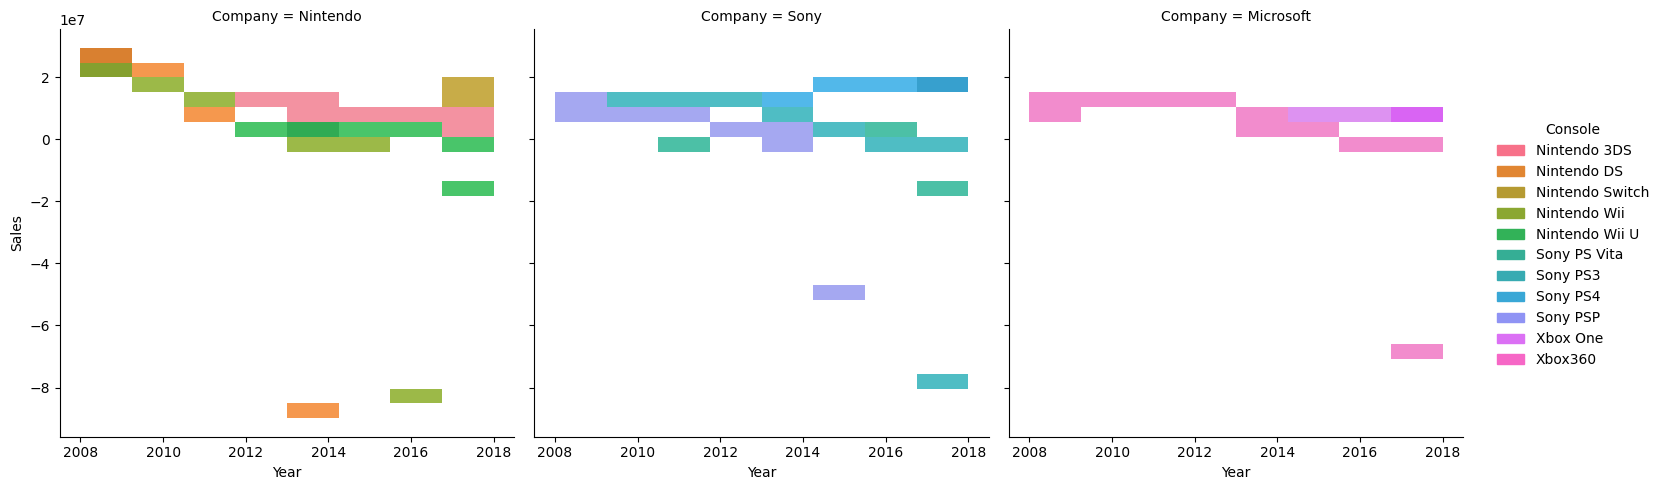

In [34]:
sns.displot(data=dfventasconsolas,y='Sales',x='Year',hue='Console',col='Company')



In [50]:
dfjuegosensteam.head()

,appid,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,0,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,0,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
pd.read_csv(r'C:\Users\p2_ge\OneDrive\Documentos\bootcamp\M5\Proyecto Integrador\3 Gaming\analisis-de-datos-de-videojuegos\juesgossteamspy_tags.csv')